In [12]:
import matplotlib.pyplot as plt
from daikin_fwt_gt_lib import *

## Decode

#### Decode a Daikin IR command starting from the base64 encoded string.

We start from some commands recorded via a Broadlink RM4 Mini IR remote, and we want to decode them to understand the structure of the IR command.

In [11]:
b64_cmds = open('captured_commands.base64.txt', 'r').readlines()
b64_cmds

['JgCWAAABOwABQAABOwABP5NTCg0LIAsfCg4LHwoNCw4JDgsNCg0LIAoNCw0LDQoNCyAKDQsNCg4KDgoNCw0LDAsOCh8LHwsOCQ4LHwsMCw4LDAsNCwwLIAsNCh8LDgoNCw0LHwoOCiAKDQsgCwwLDQsNCg0LDgofCw0KDgogCwwLDQsNCg4LHwoNCw4KDQsfCyAKAAKRlQANBQ==\n',
 'JgCWAAABOwABPgABPAABQJNSCw0KIAsfCw0KIAsNCg0LDQoNCw4KHwsNCw0LDQsMCx8LIAofCyALDQofDA0LDAsNCx8KIAsNCg0LIAsMCw0LDAsOCwwLHwsNCiALDQoNCw4JIAsNCyAKDQsfCw0KDgsMCw0LDAsgCw0KDQsgCg0LDQoNCw0KIAsfCw4KDQsfCx8LAAKSkwANBQ==\n',
 'JgCWAAABPAABPgABOwABPpVSCw0KHwsgCwwLHwsOCg0LDQofCw4LDAsNCwwLDQsNCx8LDQoNCw4KDQsNCg0LDQoOCx8LIAkOCw0KHwsOCg0LDQoNCw0LHwsNCyAKDQsNCg0LIAsMCx8LDgkgCw0LDAsOCg0LDQsfCg0LDgofCw0KDgoOCg0LHwsNCiALDQoNCyALAAKRlAANBQ==\n',
 'JgCWAAABPAABPwABPAABPpRSCg4LHwogCw0LHwoOCw0KDQsfCg4LDQoNCw0KDgsNCiAKIAsNCg0LIAsfCg0LIAoNCw0KIAsNCwwLIAsNCg0LDQoOCg4KHwsNCx8LDQsNCg4LHwoNCyALDAsfCw4KDQsNCiAKIAsMCw0LDQsfCw0KDgoOCg0LHwsgCh8LDgkgCyAKAAKSlAANBQ==']

These can be converted to bytes

In [3]:
cmds = [base64.b64decode(cmd) for cmd in b64_cmds]
cmds

[b'&\x00\x96\x00\x00\x01;\x00\x01@\x00\x01;\x00\x01?\x93S\n\r\x0b \x0b\x1f\n\x0e\x0b\x1f\n\r\x0b\x0e\t\x0e\x0b\r\n\r\x0b \n\r\x0b\r\x0b\r\n\r\x0b \n\r\x0b\r\n\x0e\n\x0e\n\r\x0b\r\x0b\x0c\x0b\x0e\n\x1f\x0b\x1f\x0b\x0e\t\x0e\x0b\x1f\x0b\x0c\x0b\x0e\x0b\x0c\x0b\r\x0b\x0c\x0b \x0b\r\n\x1f\x0b\x0e\n\r\x0b\r\x0b\x1f\n\x0e\n \n\r\x0b \x0b\x0c\x0b\r\x0b\r\n\r\x0b\x0e\n\x1f\x0b\r\n\x0e\n \x0b\x0c\x0b\r\x0b\r\n\x0e\x0b\x1f\n\r\x0b\x0e\n\r\x0b\x1f\x0b \n\x00\x02\x91\x95\x00\r\x05',
 b'&\x00\x96\x00\x00\x01;\x00\x01>\x00\x01<\x00\x01@\x93R\x0b\r\n \x0b\x1f\x0b\r\n \x0b\r\n\r\x0b\r\n\r\x0b\x0e\n\x1f\x0b\r\x0b\r\x0b\r\x0b\x0c\x0b\x1f\x0b \n\x1f\x0b \x0b\r\n\x1f\x0c\r\x0b\x0c\x0b\r\x0b\x1f\n \x0b\r\n\r\x0b \x0b\x0c\x0b\r\x0b\x0c\x0b\x0e\x0b\x0c\x0b\x1f\x0b\r\n \x0b\r\n\r\x0b\x0e\t \x0b\r\x0b \n\r\x0b\x1f\x0b\r\n\x0e\x0b\x0c\x0b\r\x0b\x0c\x0b \x0b\r\n\r\x0b \n\r\x0b\r\n\r\x0b\r\n \x0b\x1f\x0b\x0e\n\r\x0b\x1f\x0b\x1f\x0b\x00\x02\x92\x93\x00\r\x05',
 b'&\x00\x96\x00\x00\x01<\x00\x01>\x00\x01;\x00\x01>\x

In [4]:
print_bytes(cmds[0], 'hex', line=8)

26 00 96 00 00 01 3b 00
01 40 00 01 3b 00 01 3f
93 53 0a 0d 0b 20 0b 1f
0a 0e 0b 1f 0a 0d 0b 0e
09 0e 0b 0d 0a 0d 0b 20
0a 0d 0b 0d 0b 0d 0a 0d
0b 20 0a 0d 0b 0d 0a 0e
0a 0e 0a 0d 0b 0d 0b 0c
0b 0e 0a 1f 0b 1f 0b 0e
09 0e 0b 1f 0b 0c 0b 0e
0b 0c 0b 0d 0b 0c 0b 20
0b 0d 0a 1f 0b 0e 0a 0d
0b 0d 0b 1f 0a 0e 0a 20
0a 0d 0b 20 0b 0c 0b 0d
0b 0d 0a 0d 0b 0e 0a 1f
0b 0d 0a 0e 0a 20 0b 0c
0b 0d 0b 0d 0a 0e 0b 1f
0a 0d 0b 0e 0a 0d 0b 1f
0b 20 0a 00 02 91 95 00
0d 05


In [5]:
print_bytes(cmds[0], 'bin', line=8)

00100110 00000000 10010110 00000000 00000000 00000001 00111011 00000000
00000001 01000000 00000000 00000001 00111011 00000000 00000001 00111111
10010011 01010011 00001010 00001101 00001011 00100000 00001011 00011111
00001010 00001110 00001011 00011111 00001010 00001101 00001011 00001110
00001001 00001110 00001011 00001101 00001010 00001101 00001011 00100000
00001010 00001101 00001011 00001101 00001011 00001101 00001010 00001101
00001011 00100000 00001010 00001101 00001011 00001101 00001010 00001110
00001010 00001110 00001010 00001101 00001011 00001101 00001011 00001100
00001011 00001110 00001010 00011111 00001011 00011111 00001011 00001110
00001001 00001110 00001011 00011111 00001011 00001100 00001011 00001110
00001011 00001100 00001011 00001101 00001011 00001100 00001011 00100000
00001011 00001101 00001010 00011111 00001011 00001110 00001010 00001101
00001011 00001101 00001011 00011111 00001010 00001110 00001010 00100000
00001010 00001101 00001011 00100000 00001011 00001100 00001011 0

Then we can convert the bytes to integers by using two bytes per integer, using the little endian convention.

In [6]:
times = [bytes_to_times(cmd) for cmd in cmds]
times[0], times[1]

(array([   38,   150,   256,    59, 16385,   256,    59, 16129, 21395,
         3338,  8203,  7947,  3594,  7947,  3338,  3595,  3593,  3339,
         3338,  8203,  3338,  3339,  3339,  3338,  8203,  3338,  3339,
         3594,  3594,  3338,  3339,  3083,  3595,  7946,  7947,  3595,
         3593,  7947,  3083,  3595,  3083,  3339,  3083,  8203,  3339,
         7946,  3595,  3338,  3339,  7947,  3594,  8202,  3338,  8203,
         3083,  3339,  3339,  3338,  3595,  7946,  3339,  3594,  8202,
         3083,  3339,  3339,  3594,  7947,  3338,  3595,  3338,  7947,
         8203,    10, 37122,   149,  1293]),
 array([   38,   150,   256,    59, 15873,   256,    60, 16385, 21139,
         3339,  8202,  7947,  3339,  8202,  3339,  3338,  3339,  3338,
         3595,  7946,  3339,  3339,  3339,  3083,  7947,  8203,  7946,
         8203,  3339,  7946,  3340,  3083,  3339,  7947,  8202,  3339,
         3338,  8203,  3083,  3339,  3083,  3595,  3083,  7947,  3339,
         8202,  3339,  3338,  35

As can be seen, there is a pattern in the values. They are composed of:
- a prefix similar to: `[38,   150,   256,    59, 16385,   256,    59, 16129, 21395]`
- a body composed of values which are either `~3338` or `~7947`
- a suffix similar to: `[11, 37378,   147,  1293]`

Let's extract the body by trigger on the `~21000` and `~37000` values, and inspect it:

In [7]:
triggered = [trigger_on_times(t) for t in times]
triggered[0]

array([3338, 8203, 7947, 3594, 7947, 3338, 3595, 3593, 3339, 3338, 8203,
       3338, 3339, 3339, 3338, 8203, 3338, 3339, 3594, 3594, 3338, 3339,
       3083, 3595, 7946, 7947, 3595, 3593, 7947, 3083, 3595, 3083, 3339,
       3083, 8203, 3339, 7946, 3595, 3338, 3339, 7947, 3594, 8202, 3338,
       8203, 3083, 3339, 3339, 3338, 3595, 7946, 3339, 3594, 8202, 3083,
       3339, 3339, 3594, 7947, 3338, 3595, 3338, 7947, 8203])

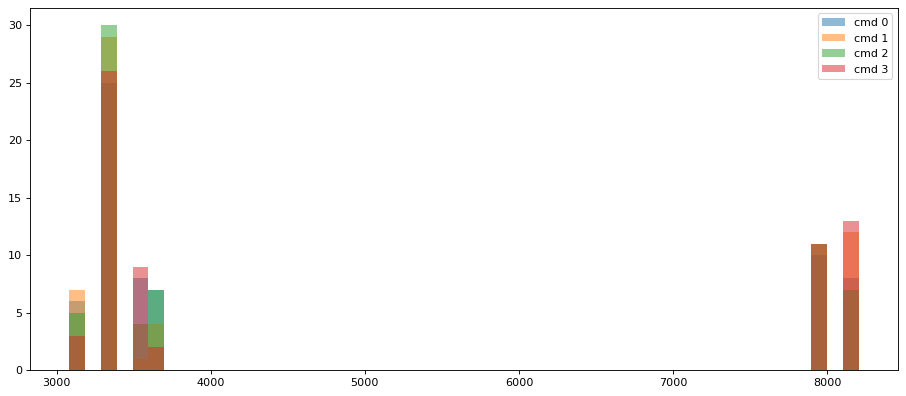

In [8]:
plt.figure(figsize=(14, 6), dpi=80)
for i, t in enumerate(triggered):
    plt.hist(t, bins=50, alpha=0.5, label=f'cmd {i}')
plt.legend()
plt.show()

This confirms the pattern. The body is composed of 2 values, which are either `~3338` or `~7947`.

The values `~3338` represent a `0`, while `~7947` represent a `1`. We can convert the body to a binary array.

In [9]:
bins = [times_to_bin(t) for t in triggered]
for i, b in enumerate(bins):
    print(f'cmd {i}:', end=' ')
    print_bytes(b, 'bin')

cmd 0: 00010110 10000100 00000000 00010011 00010100 00010101 00100100 11000100
cmd 1: 00010110 10000100 00010111 00010011 00010100 00010101 00100100 11001100
cmd 2: 00010110 10000001 00000000 00010011 00010100 00010101 00100100 10010100
cmd 3: 00010110 10000001 01011001 00010010 00010100 00010101 00100011 11011100


Now, we have the 64 bits of the daikin protocol. We can extract the temperature, the mode, the fan speed, the swing, the power, and the timer.

In [10]:
explain_cmd(bins[0])

Fan mode: low
Mode: fan_only
Clock: 13:00
Time on: OFF 14:00
Time off: OFF 15:00
Temperature: 24
Checksum: 12, Calculated: 12
Power Toggle: OFF
Sleep: OFF
Swing: OFF
